MIE1624 Assignment 1- Kaggle ML & DS Survey Challenge
Objectives: 
1. Understand the nature of women's representation in Data Science and Machine Learning
2. The effects of education on income level

In [80]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import urllib
import matplotlib.pyplot as plt
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
    import statsmodels.api as sm
import numpy as np
%matplotlib inline
from sklearn.utils import resample
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import statistics
import statsmodels.api as sm
import seaborn as sns

In [81]:
# Convert Dataset to Panda's dataframe
df  = pd.read_csv("clean_kaggle_data.csv", low_memory=False)

In [82]:
# Show dataframe
df

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,20024,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN
10725,20029,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10726,20033,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10727,20034,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [83]:
# Show statistical analysis of dataset - focus on the how many participants and the salary
df.describe()

,Unnamed: 0,Time from Start to Finish (seconds),Q7_Part_12,Q9_Part_11,Q10_Part_13,Q12_Part_3,Q14_Part_11,Q16_Part_15,Q17_Part_11,Q18_Part_6,...,Q37_Part_11,Q39_Part_11,Q26_B_Part_11,Q27_B_Part_11,Q28_B_Part_10,Q29_B_Part_17,Q31_B_Part_14,Q33_B_Part_7,Q34_B_Part_11,Q35_B_Part_10
count,10729.000000,1.072900e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,10057.796719,9.587565e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5781.445851,6.518651e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.070000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5060.000000,5.470000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10115.000000,7.440000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,15079.000000,1.165000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,20035.000000,1.104261e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#Shows us the questions that were answered during the survey and how to call it
df.columns

Index(['Unnamed: 0', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=356)

**Question 1 -** Exploratory data analysis to analyze the survey dataset and summarizing main characteristics.

In [85]:
#Isolating main characteristics of participants and graphing them
country = df['Q3']
age = df['Q1']
education = df['Q4']
experience = df['Q5']
salary = df['Q24']
gender = df['Q2']

Text(0, 0.5, 'Frequency')

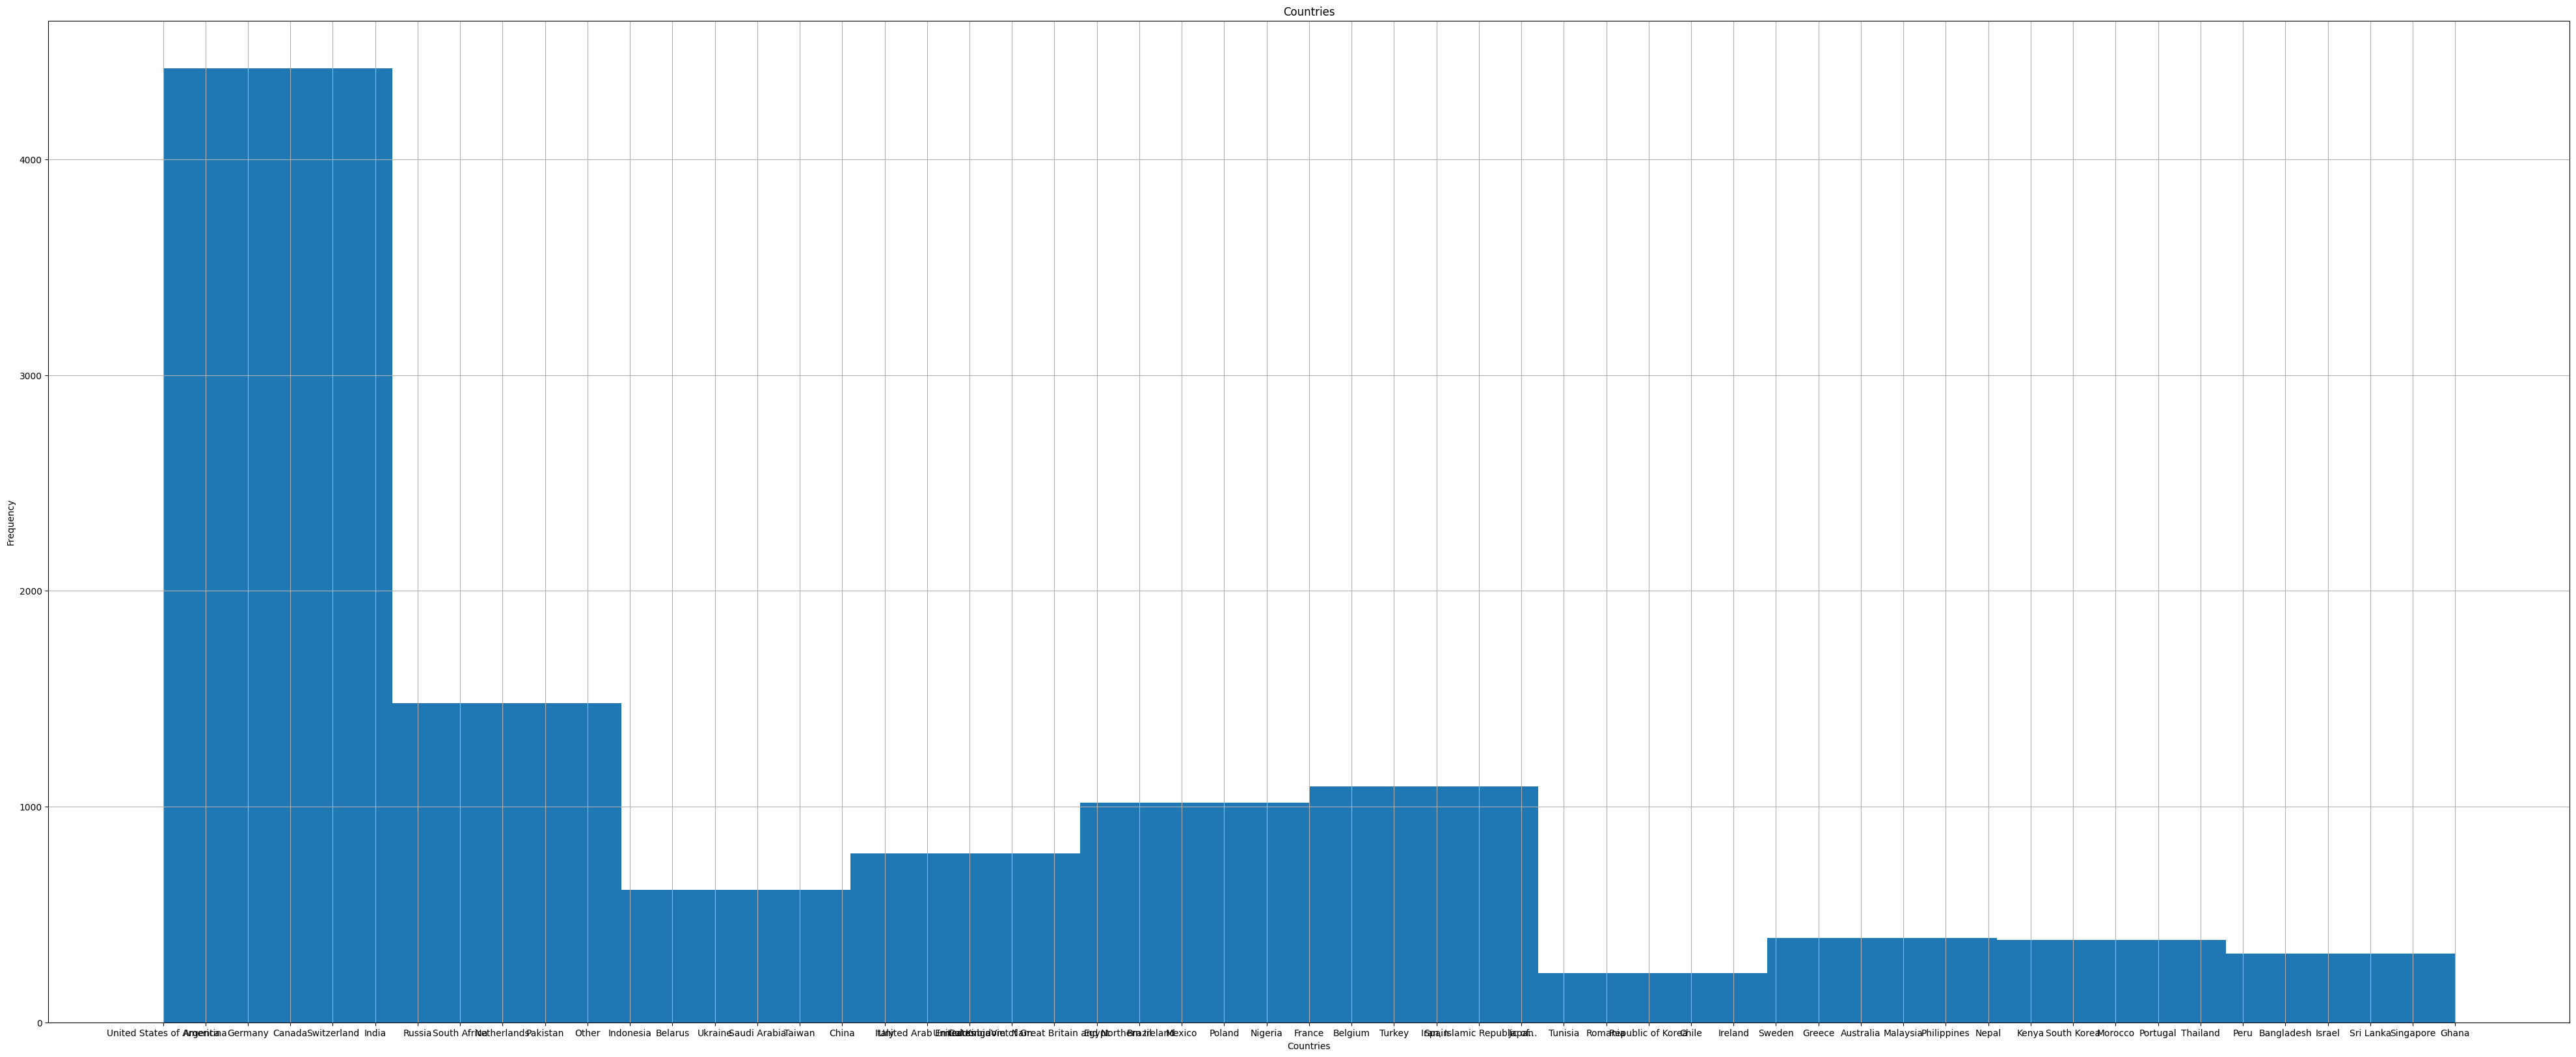

In [86]:
#Plotting by country
country.hist(figsize= (50,20)) 
plt.title('Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency')

In [87]:
#We see that most of the participants are from India and United States
country.value_counts()[:10].index.tolist()

['India',
 'United States of America',
 'Other',
 'Brazil',
 'Japan',
 'Russia',
 'United Kingdom of Great Britain and Northern Ireland',
 'Germany',
 'Nigeria',
 'Spain']

Text(0, 0.5, 'Frequency')

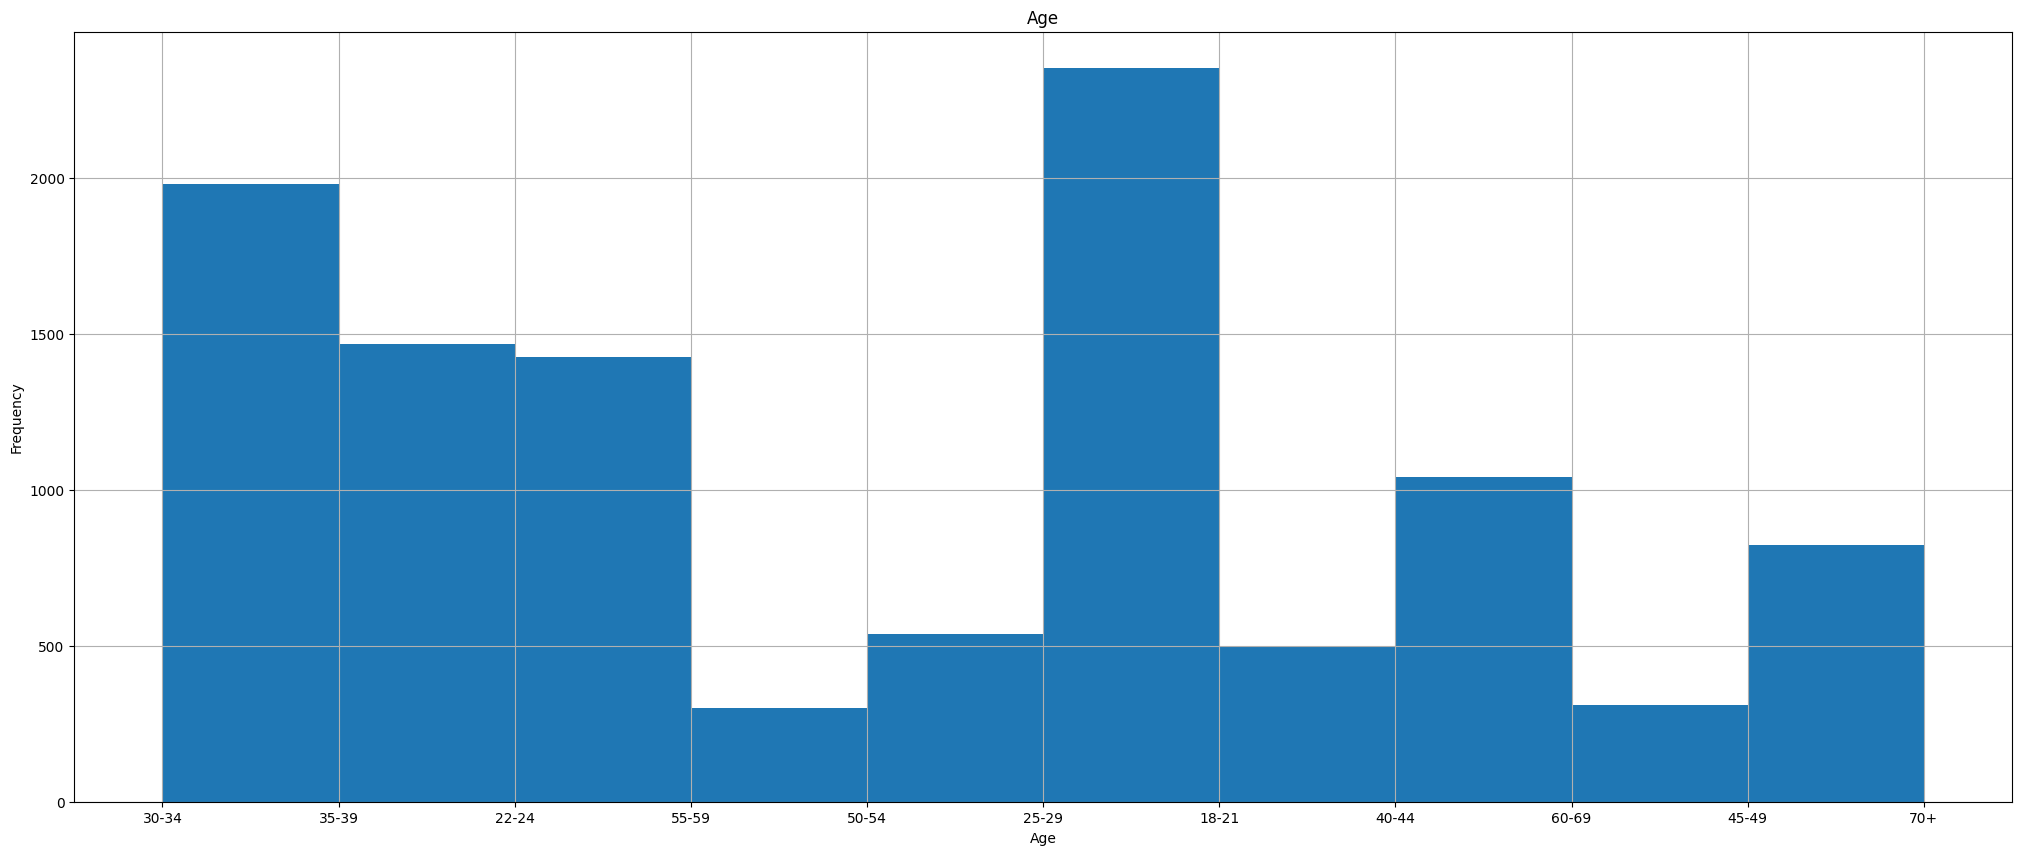

In [88]:
#Plotting by age group
age.hist(figsize= (25,10))
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [89]:
#We see that 25-40 year olds are most likely to participate in the survey
age.value_counts()[:10].index.tolist()

['25-29',
 '30-34',
 '35-39',
 '22-24',
 '40-44',
 '45-49',
 '50-54',
 '18-21',
 '60-69',
 '55-59']

Text(0, 0.5, 'Frequency')

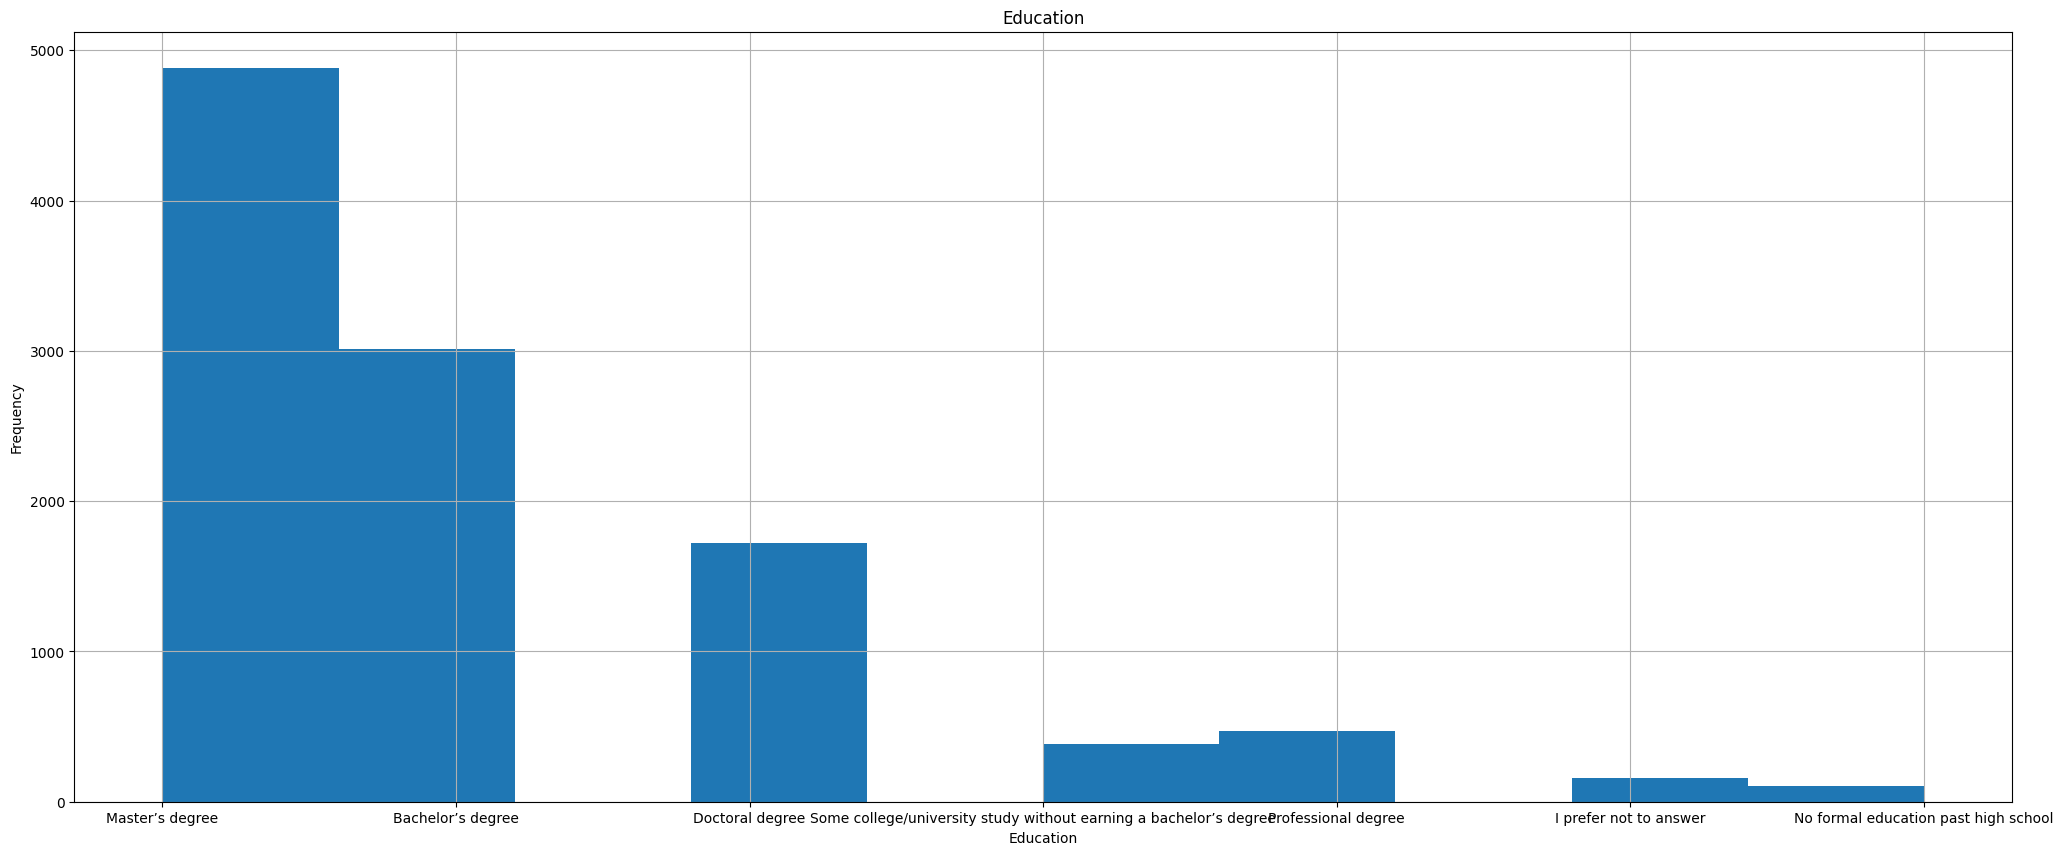

In [90]:
education.hist(figsize= (25,10))
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Frequency')

In [91]:
# We can observe that most of the participants have a master's degree as their highest level of education
education.value_counts().index.tolist()

['Master’s degree',
 'Bachelor’s degree',
 'Doctoral degree',
 'Professional degree',
 'Some college/university study without earning a bachelor’s degree',
 'I prefer not to answer',
 'No formal education past high school']

Text(0, 0.5, 'Frequency')

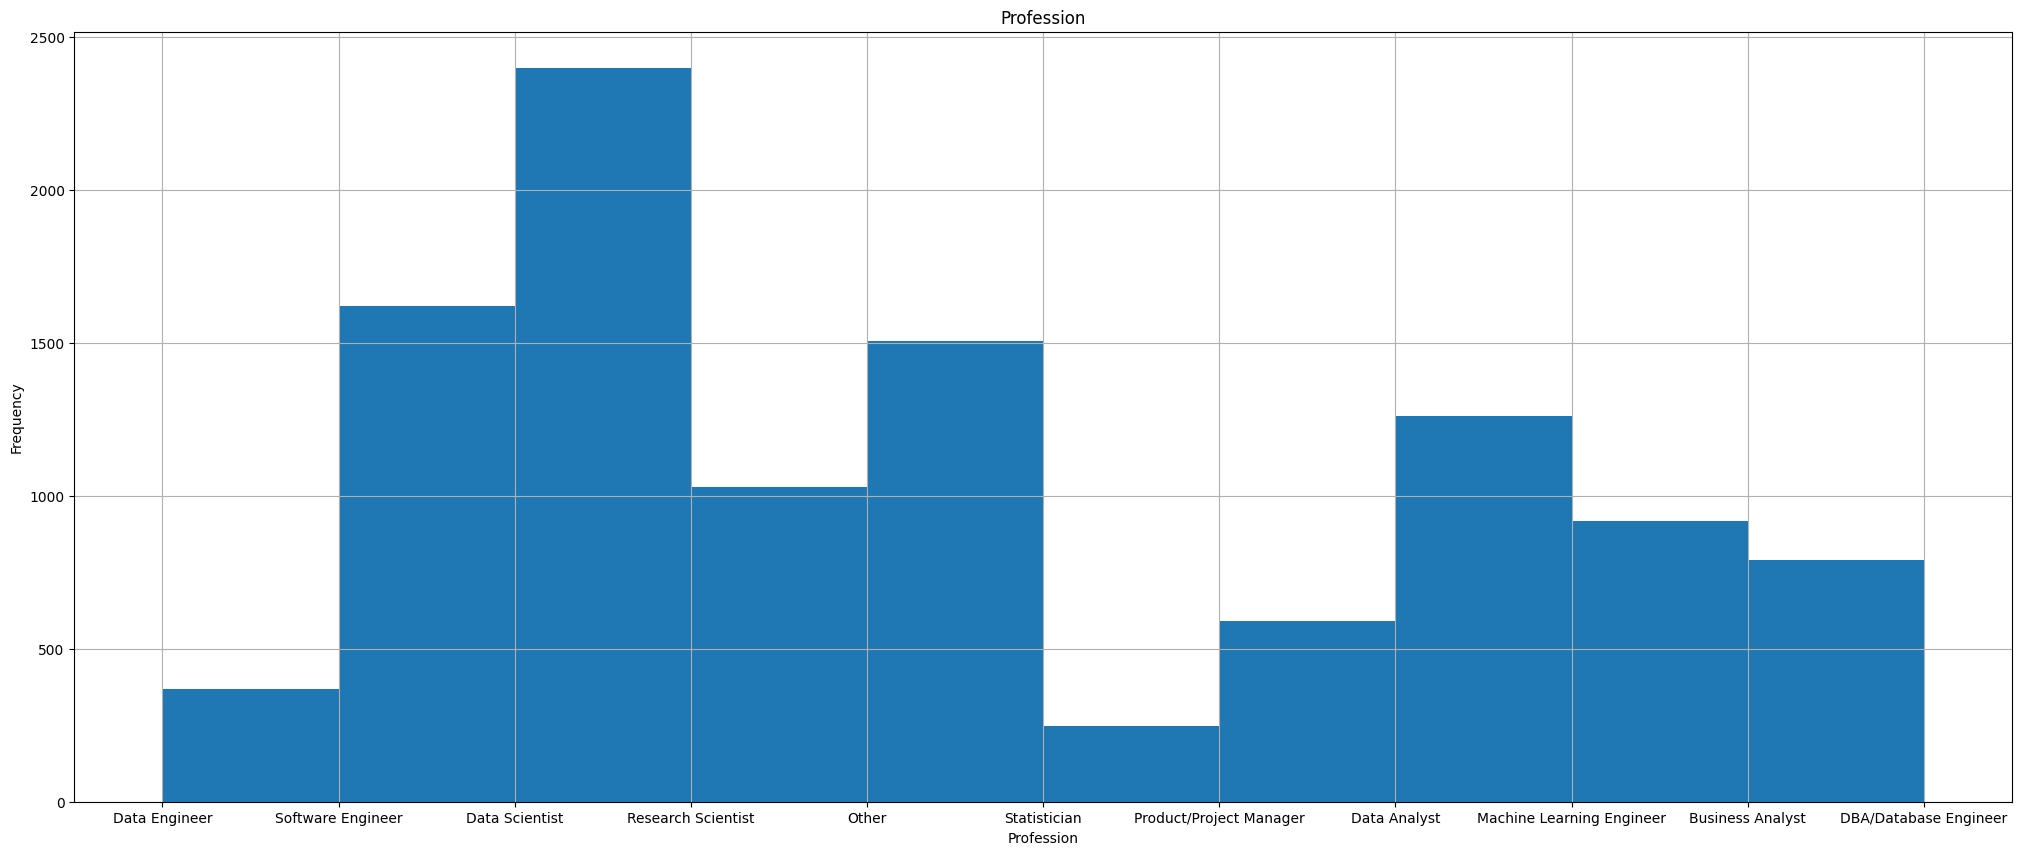

In [92]:
#Plotting profession
experience.hist(figsize= (25,10))
plt.title('Profession')
plt.xlabel('Profession')
plt.ylabel('Frequency')

In [93]:
#We can see that there is a wide variety of professions who answered the survey, mostly data scientists
experience.value_counts().index.tolist()

['Data Scientist',
 'Software Engineer',
 'Other',
 'Data Analyst',
 'Research Scientist',
 'Machine Learning Engineer',
 'Business Analyst',
 'Product/Project Manager',
 'Data Engineer',
 'Statistician',
 'DBA/Database Engineer']

Text(0, 0.5, 'Frequency')

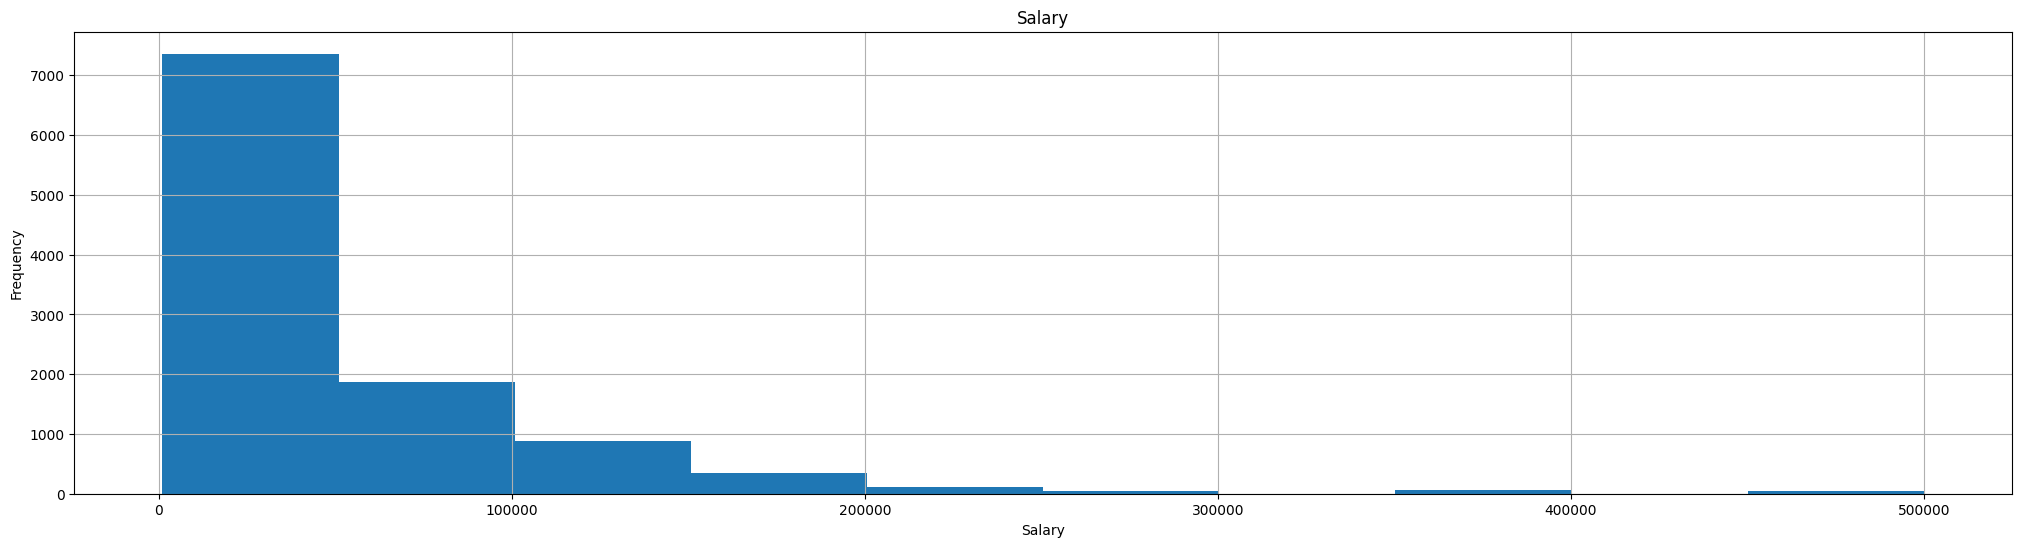

In [94]:
#Plotting salary range
salary.hist()
plt.title('Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

In [95]:
#Most common salaries are typically very low, perhaps they did not want to disclose their salary or does machine learning on the side
salary.value_counts().index.tolist()

[1000,
 15000,
 2000,
 125000,
 50000,
 40000,
 60000,
 7500,
 20000,
 70000,
 25000,
 80000,
 10000,
 200000,
 3000,
 150000,
 30000,
 100000,
 5000,
 90000,
 4000,
 250000,
 400000,
 500000,
 300000]

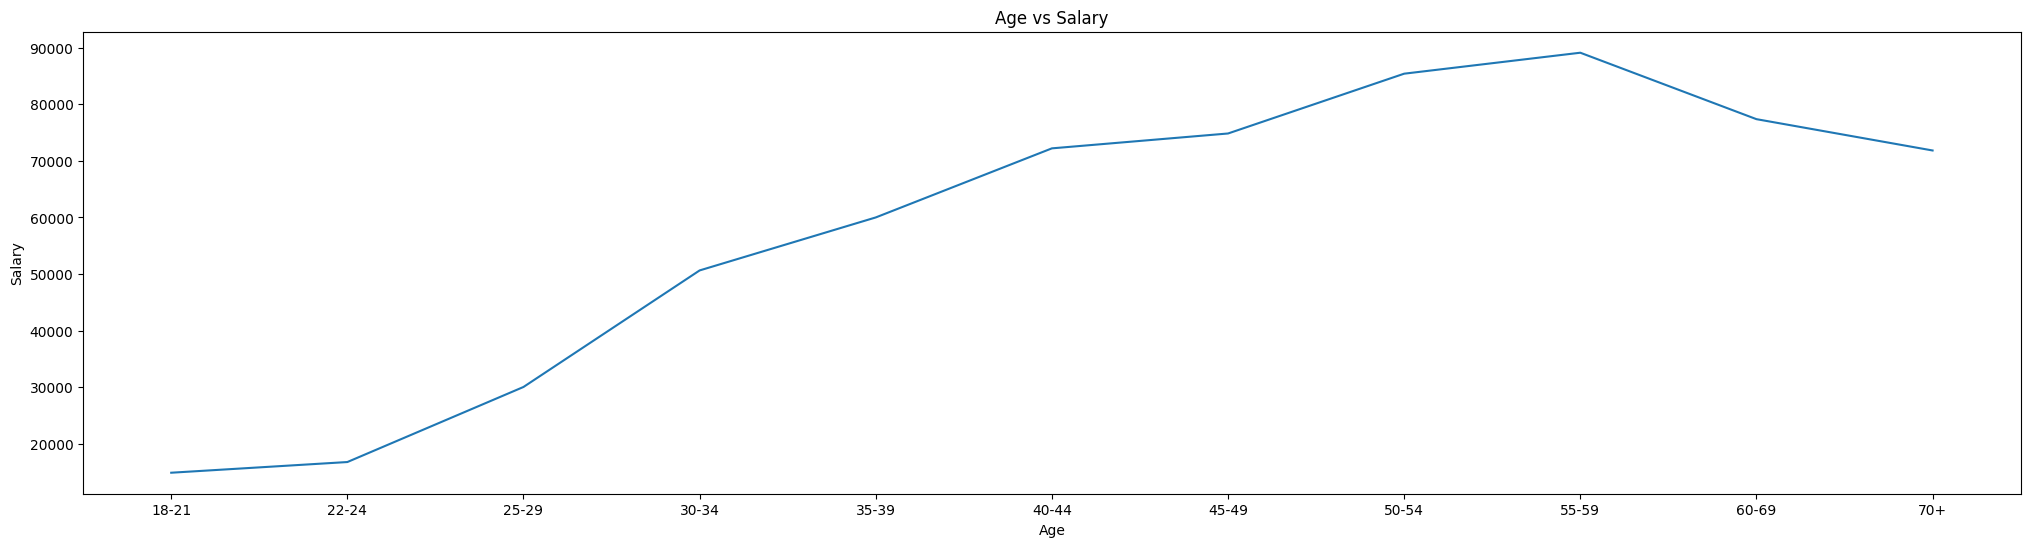

In [96]:
# Need to show relationship between two variables (Age and Salary)
# Salary tends to increase based on age, this makes logical sense since people accumulate experience

plt.plot(df.groupby(['Q1'])['Q24'].mean())
plt.title('Age vs Salary')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

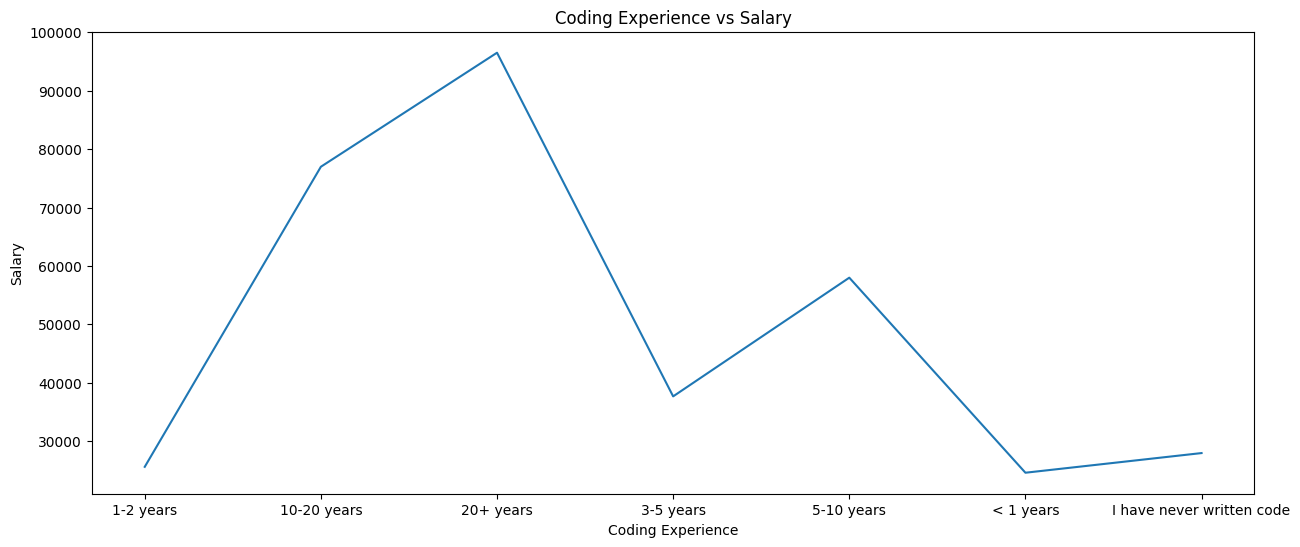

In [97]:
#Need to show relationship between two variables Coding experience and Salary)
# Salary tends to increase based on coding experience, this makes logical sense since people accumulate experience

plt.rcParams["figure.figsize"] = (15,6)
plt.plot(df.groupby(['Q6'])['Q24'].mean())
plt.title('Coding Experience vs Salary')
plt.xlabel("Coding Experience")
plt.ylabel("Salary")
plt.show()

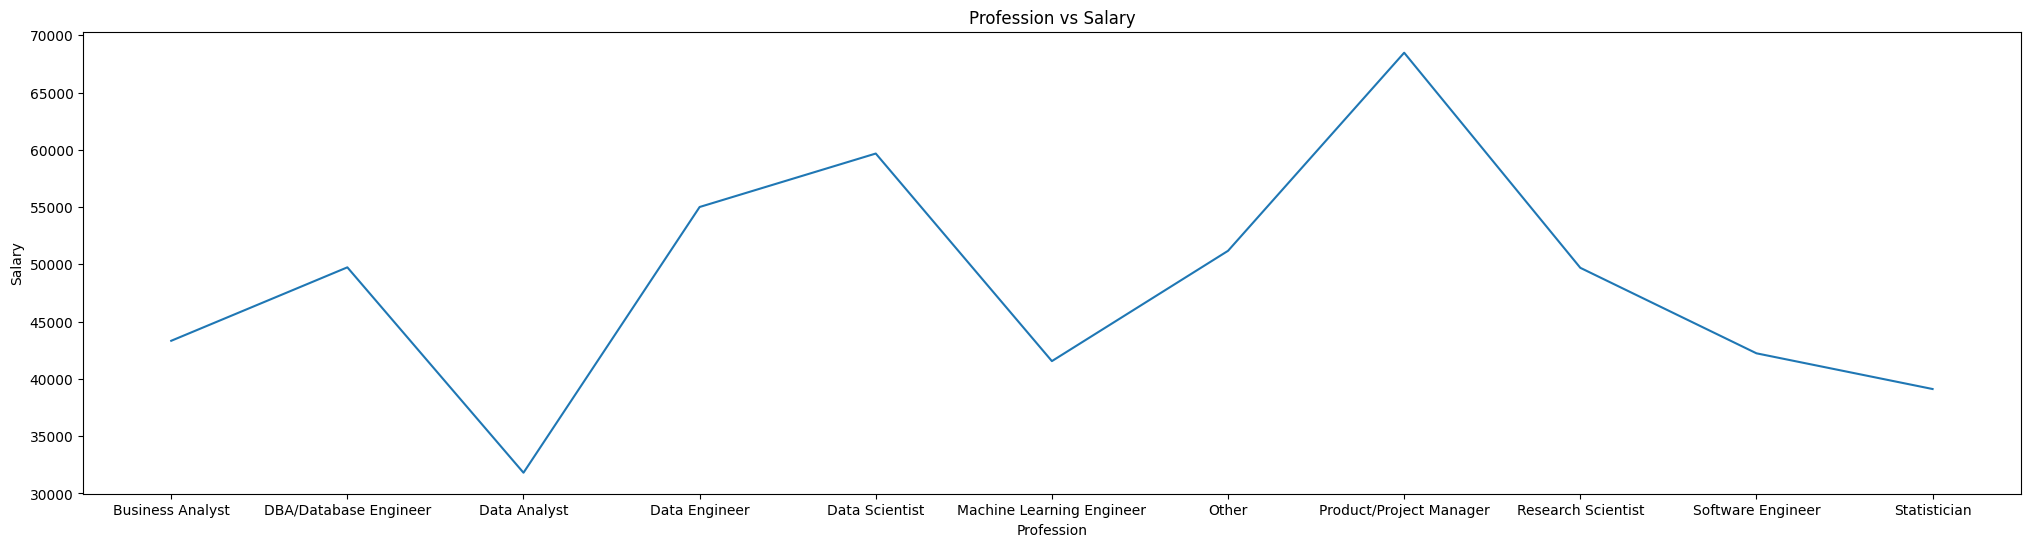

In [98]:
# Need to show relationship between two variables Profession and Salary)
# It seems that project manager positions have a higher salary 

plt.rcParams["figure.figsize"] = (25,6)
plt.plot(df.groupby(['Q5'])['Q24'].mean())
plt.title('Profession vs Salary')
plt.xlabel("Profession")
plt.ylabel("Salary")
plt.show()

**Question 2 - **Exploring the Difference between average salary of men vs women

In [99]:
# Examining the list of gender options
gender.value_counts().index.tolist()

['Man', 'Woman', 'Prefer not to say', 'Prefer to self-describe', 'Nonbinary']

In [100]:
# Creating a new df with gender and salary
adf=df[['Q2','Q24']]
# Grouping by gender
gender_data = adf.groupby('Q2')

In [101]:
# Descriptive statistics
# We can see a large difference in salary means between men and women. It also has similar variance. 
print(gender_data.mean())
print(gender_data.var())

                                   Q24
Q2                                    
Man                       50750.619928
Nonbinary                110050.000000
Prefer not to say         64316.793893
Prefer to self-describe   50217.391304
Woman                     36417.112299
                                  Q24
Q2                                   
Man                      4.948838e+09
Nonbinary                1.129268e+10
Prefer not to say        8.031462e+09
Prefer to self-describe  1.163709e+10
Woman                    3.533436e+09


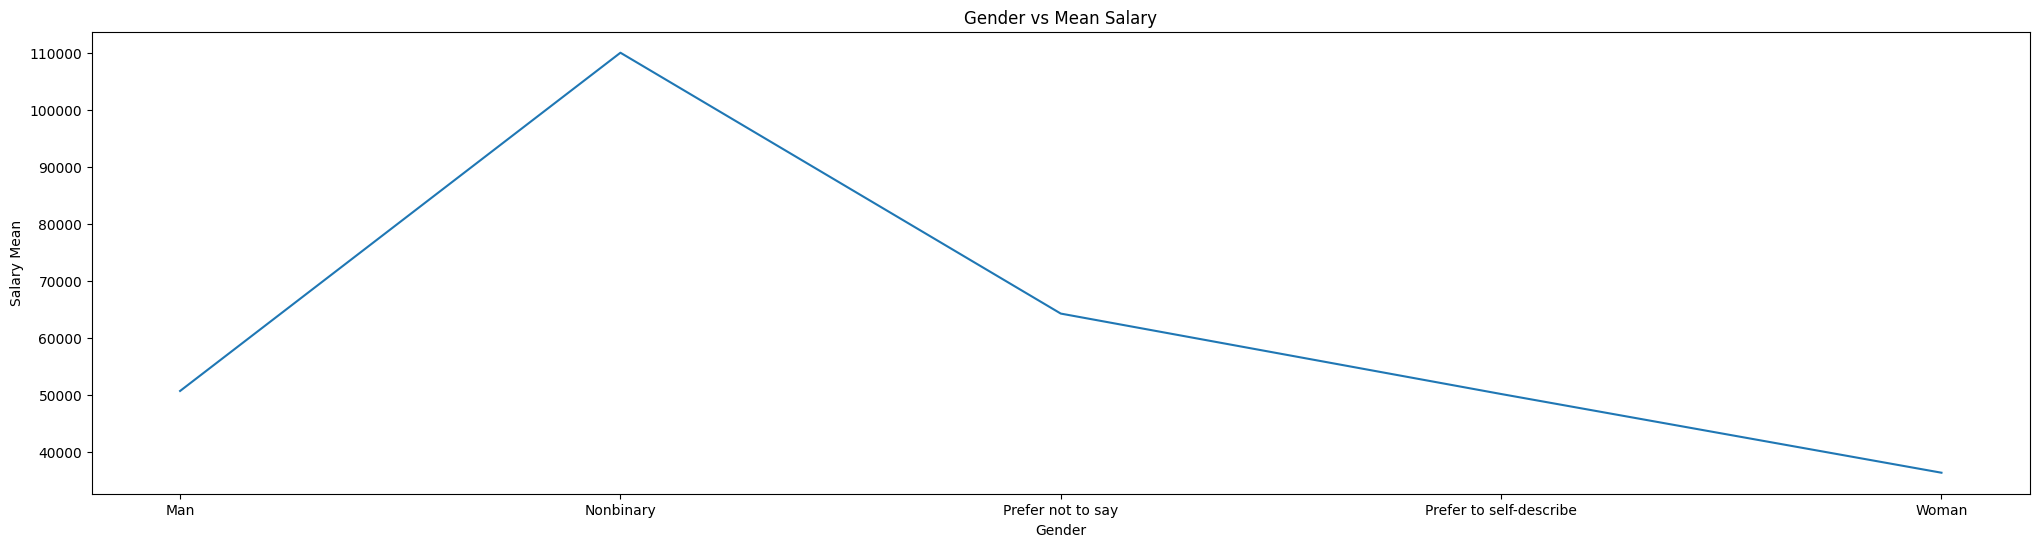

In [102]:
# Graphically shows salary mean between genders
plt.plot(gender_data.mean())
plt.title('Gender vs Mean Salary')
plt.xlabel("Gender")
plt.ylabel("Salary Mean")
plt.show()

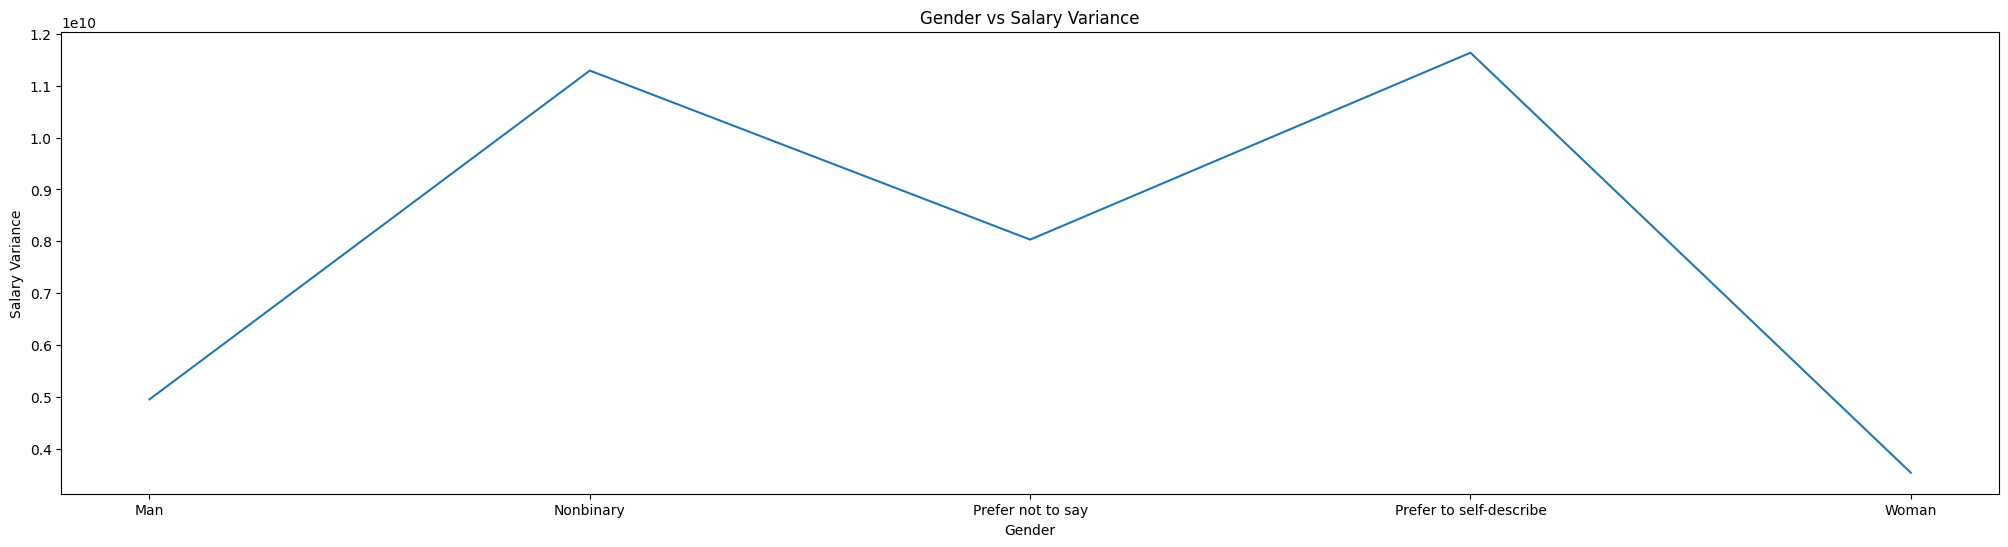

In [103]:
# Graphically shows salary variance between genders
plt.plot(gender_data.var())
plt.title('Gender vs Salary Variance')
plt.xlabel("Gender")
plt.ylabel("Salary Variance")
plt.show()

In [104]:
female_salary = adf[adf['Q2'] == 'Woman']['Q24']
male_salary = adf[adf['Q2'] == 'Man']['Q24']

Text(0, 0.5, 'Frequency')

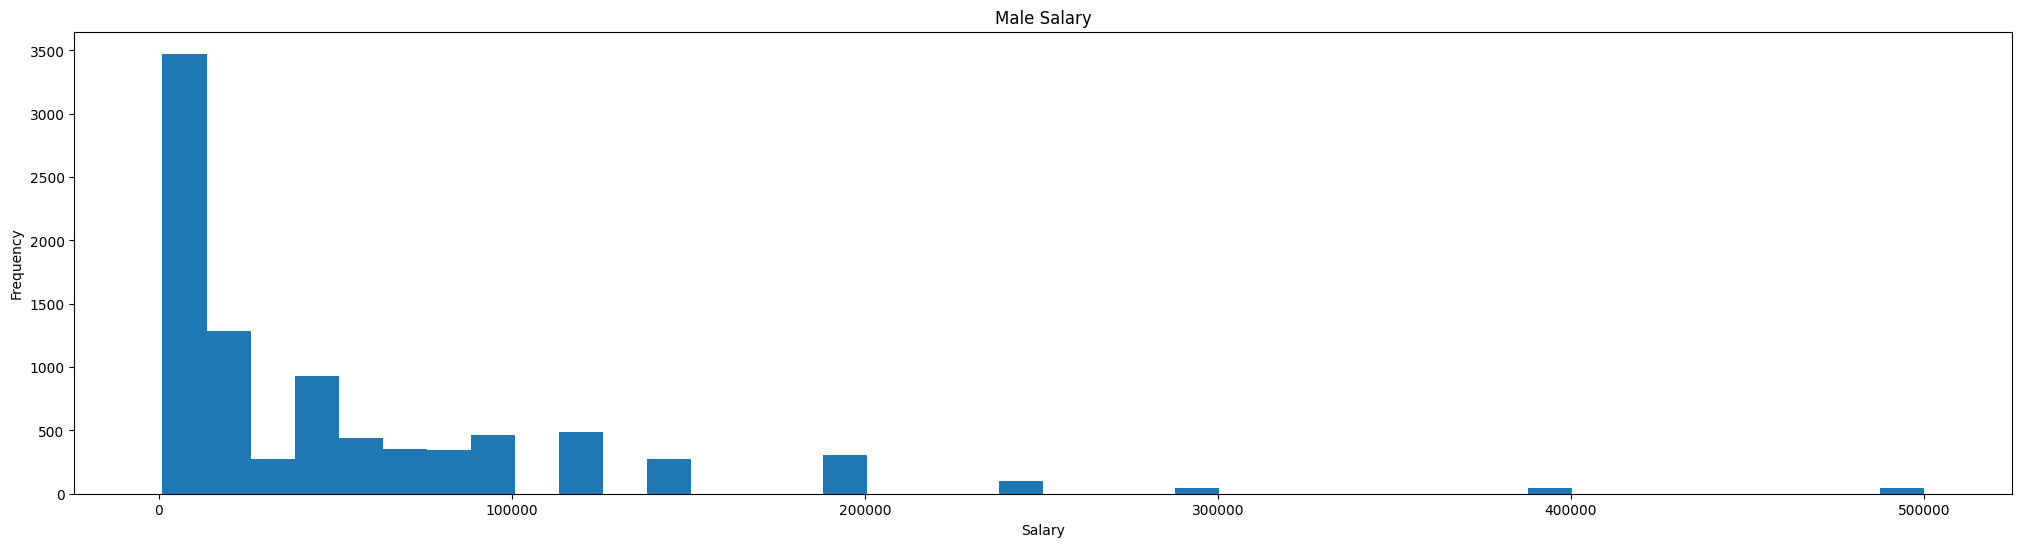

In [105]:
# Plotting male salary - doesn't fit normal distribution
plt.hist(male_salary,bins=40)
plt.title('Male Salary')
plt.xlabel("Salary")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

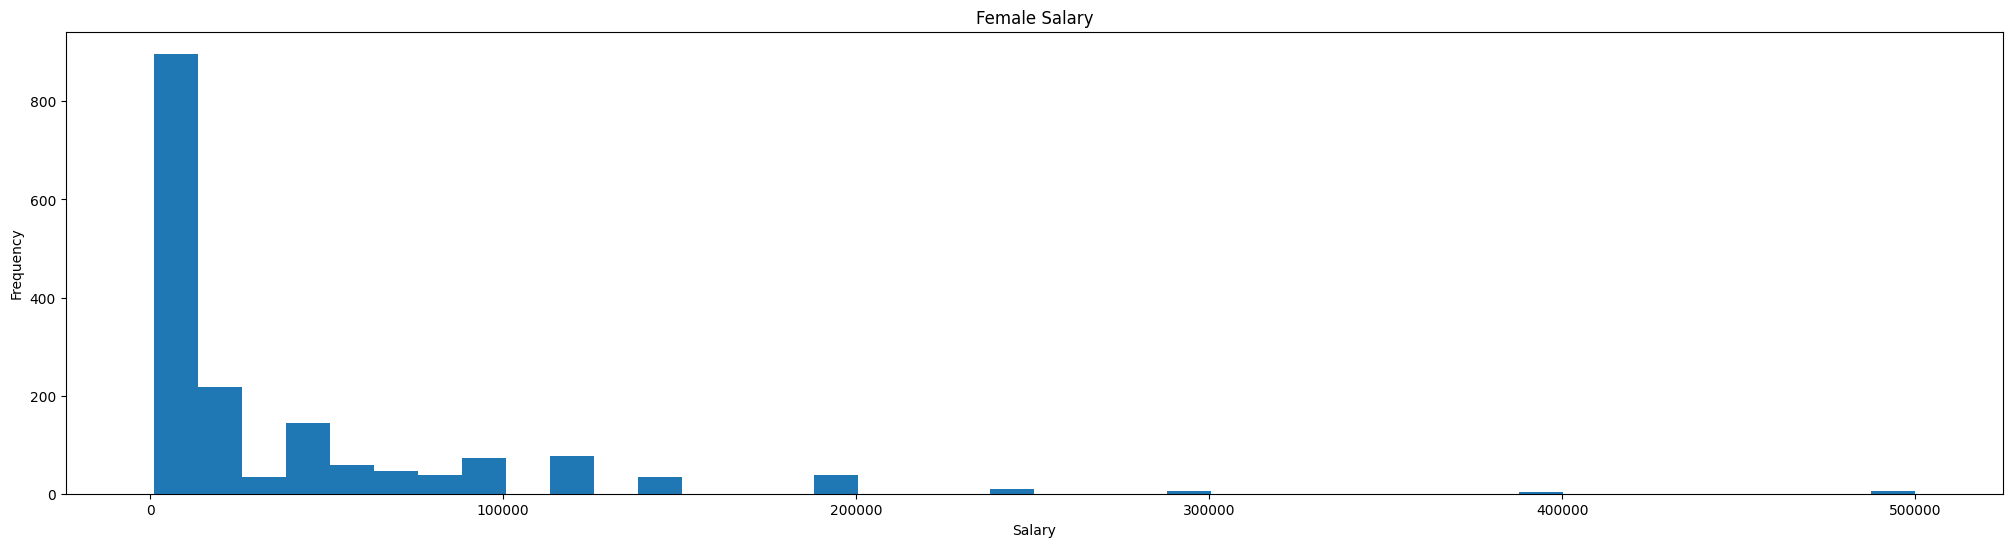

In [106]:
# Plotting female salary - doesn't fit normal distribution
plt.hist(female_salary,bins=40)
plt.title('Female Salary')
plt.xlabel("Salary")
plt.ylabel("Frequency")

In [107]:
# Will perform 2-sample t-test even though it doesn't follow the assumptions required:
# Assumptions: 2 groups are independent, normally distributed, and similar variance
# Our data has similar variance and can assume independent, however, data is not normally distributed
# Therefore cannot run t-test
# The null hypothesis states that the difference in group means is zero

tc, pc = stats.ttest_ind(female_salary, male_salary)
print ("t-test: t = %g  p = %g" % (tc, pc))

# Since p = 4.77e-15 << 0.05, it is statistically significant), we reject the null hypothesis
# We can observe a clear relationship between gender and relationship. Women are paid less than their male counterparts
# This is the case if data was normally distributed, since it isn't t-test may not be valid since we're using the wrong assumptions

t-test: t = -7.84433  p = 4.77315e-15


In [108]:
# Bootstrapping the data for the data to converge to central limit theorem and fitting a normal distribution
# Procedure: Randomly select a sample, repeating that multiple times to calculate the mean, and then plotting the distribution of those means

# Male bootstrapping
boot_means_male = []
for i in range (1000): # Bootstrap 1000 times to get 1000 means
  boot_male = resample(male_salary, replace=True, n_samples = len(male_salary))
  boot_mean = np.mean(boot_male) # calculate the mean for each iteration
  boot_means_male.append(boot_mean) # append the mean to boot_means
boot_means_male = pd.DataFrame(boot_means_male)

# Female bootstrapping
boot_means_female = []
for i in range(1000):
    boot_female = resample(female_salary, replace=True, n_samples=len(female_salary)) # take a random sample each iteration
    boot_mean = np.mean(boot_female)# calculate the mean for each iteration
    boot_means_female.append(boot_mean) # append the mean to boot_means
boot_means_female = pd.DataFrame(boot_means_female)

Text(0, 0.5, 'Frequency')

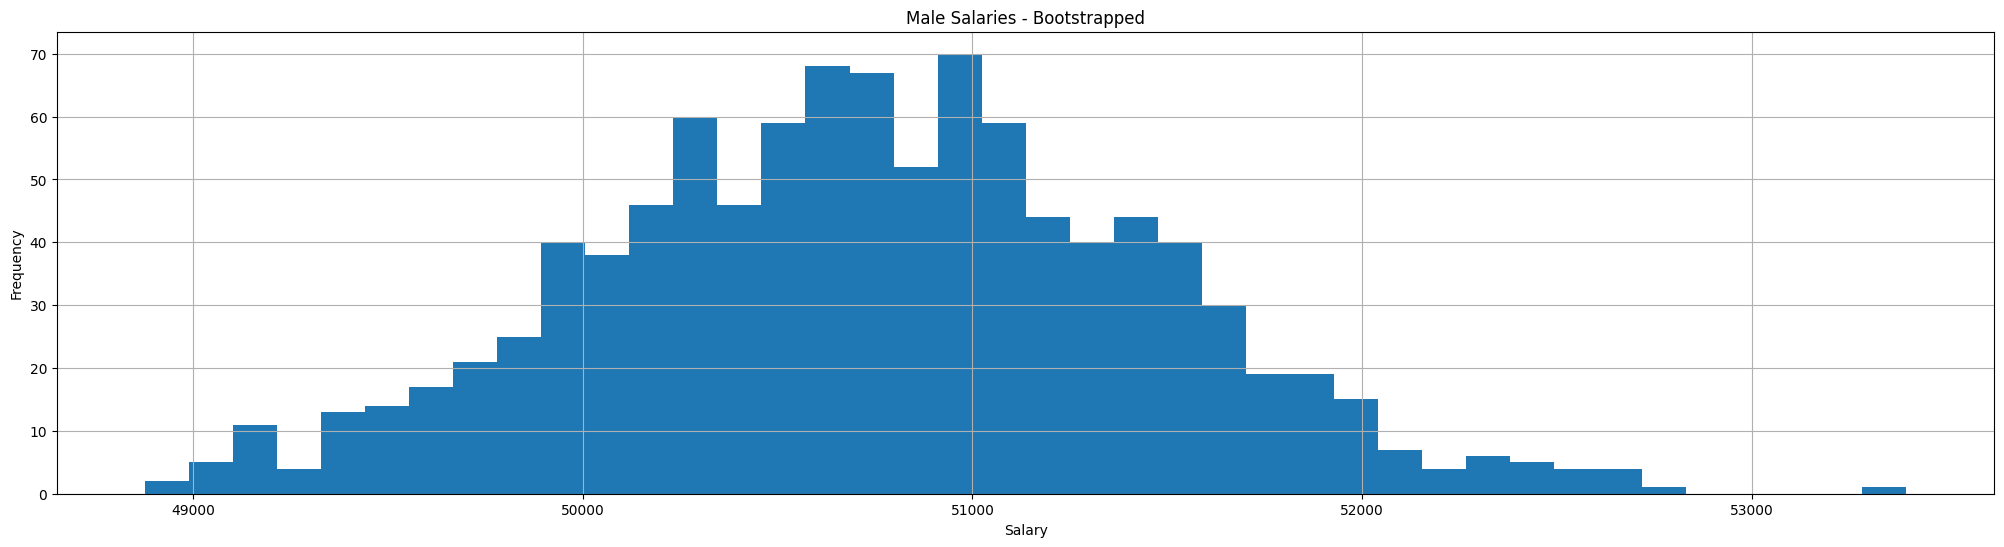

In [109]:
boot_means_male.hist(bins=40)
plt.title('Male Salaries - Bootstrapped')
plt.xlabel("Salary")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

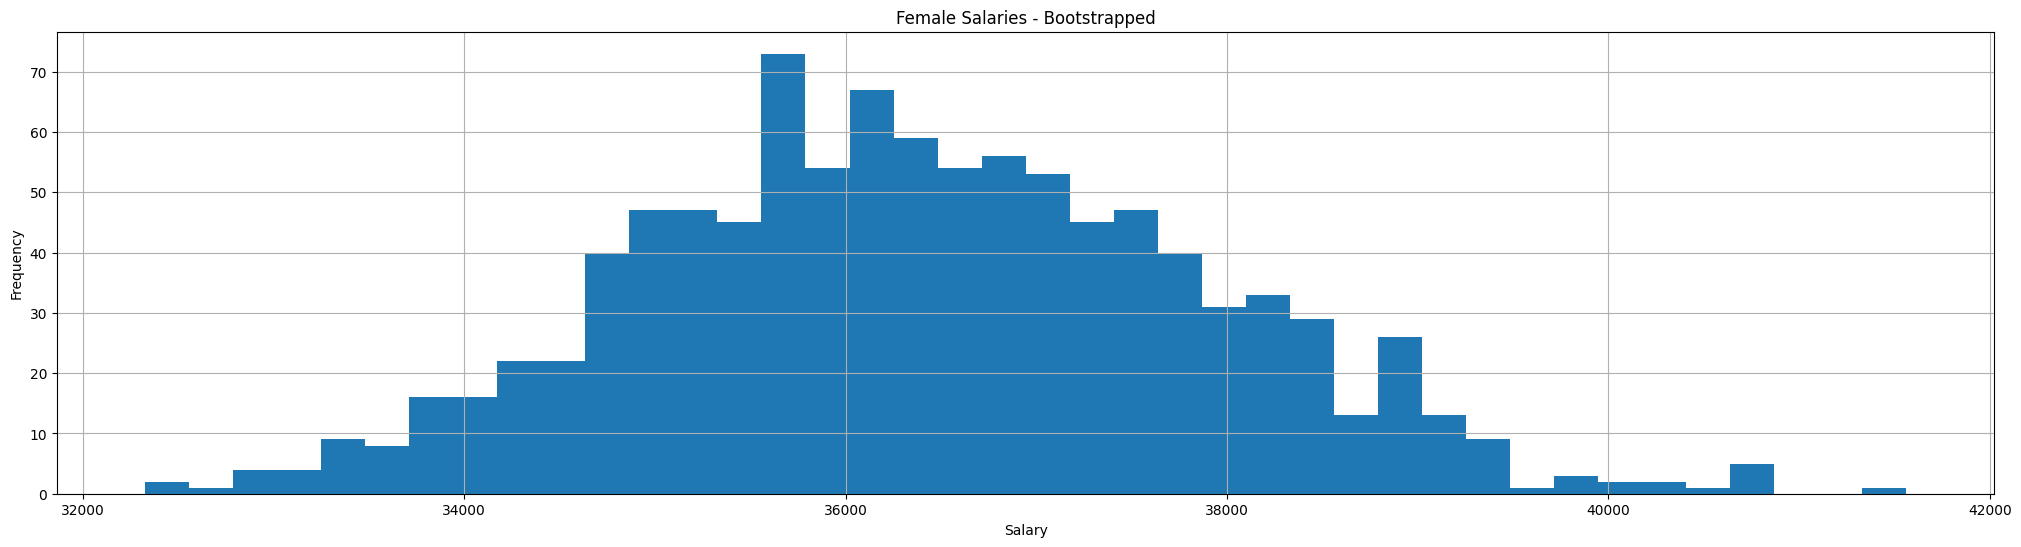

In [110]:
boot_means_female.hist(bins=40)
plt.title('Female Salaries - Bootstrapped')
plt.xlabel("Salary")
plt.ylabel("Frequency")

In [111]:
# Create a DataFrame with difference in means of salaries of both male and female
compare_gender = pd.concat([boot_means_male.reset_index(drop=True),\
                     boot_means_female.reset_index(drop=True)], axis=1)
compare_gender.columns = ['male_salary', 'female_salary']
# compare_gender.set_axis(['male_salary', 'female_salary'])
compare_gender['diff']=compare_gender['male_salary']-compare_gender['female_salary']

In [112]:
compare_gender

,male_salary,female_salary,diff
0,50025.867899,36743.612597,13282.255302
1,49755.748422,36085.264409,13670.484013
2,49409.096032,34545.751634,14863.344398
3,49330.421551,37155.971480,12174.450071
4,51098.343102,34776.292335,16322.050767
...,...,...,...
995,50716.692967,35656.268568,15060.424399
996,51130.466637,37073.380867,14057.085769
997,49166.422453,39910.576352,9255.846101
998,50603.246168,36369.578134,14233.668033


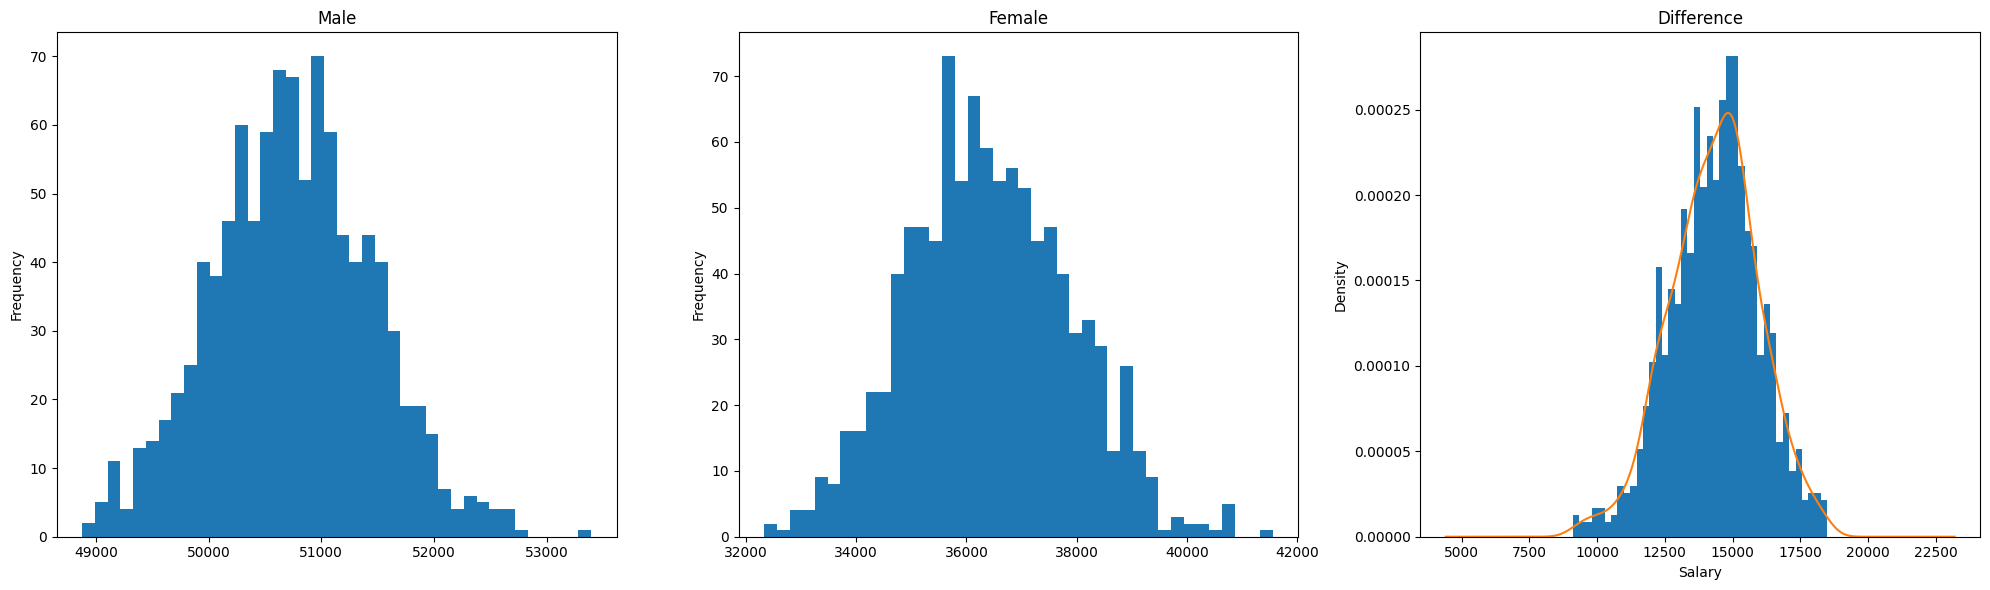

In [113]:
#Comparation of histogram in 'Salaries' and the histogram of difference
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
compare_gender['male_salary'].plot(kind='hist', rot=0, ax=axes[0], bins=40, title='Male')
compare_gender['female_salary'].plot(kind='hist', rot=0, ax=axes[1], bins=40, title='Female')
compare_gender['diff'].plot(kind='hist', rot=0, ax=axes[2], bins=40, title='Difference',density='True')
compare_gender['diff'].plot.kde(zorder=2, color='C1')
plt.xlabel("Salary")
fig.tight_layout()

In [114]:
# Since the data is now normally disributed, we can perform a 2-sample t-test
# The null hypothesis states that the difference in group means is zero

tc, pc = stats.ttest_ind(boot_means_female, boot_means_male)
print ("t-test: t = %g  p = %g" % (tc, pc))

# Since p = 0< 0.05, it is statistically significant, we reject the null hypothesis
# We can observe a clear relationship between gender and salaries. Women are paid less than their male counterparts

t-test: t = -276.609  p = 0


**Summarize Findings:** After applying bootstrapping to the male and female salaries, the mean salary data was normally distibuted. This allowed us to perform a 2-sample t-test. Using the 2 sample t-test, we got a p value equal to 0, that shows the probability of the men salary mean and the women salary mean being equivalent. Thus, we can conclude there is a relationship between gender and salary. Women are being underpaid compared to their men counterpart if we solely look at gender and salaries. 

**Question 3 -** Analyzing the relationship between education and salary

In [115]:
# Checking the possible selections of education 
education.value_counts().index.tolist()

['Master’s degree',
 'Bachelor’s degree',
 'Doctoral degree',
 'Professional degree',
 'Some college/university study without earning a bachelor’s degree',
 'I prefer not to answer',
 'No formal education past high school']

In [116]:
# Isolating dataframe by education and salary
adf=df[['Q4','Q24']]
education_data = adf.groupby('Q4')

In [117]:
# Descriptive statistics
# We can see a large difference in salary means between education levels. It also has similar variance. 

print(education_data.mean())
print(education_data.var())

                                                             Q24
Q4                                                              
Bachelor’s degree                                   35732.824427
Doctoral degree                                     68719.441211
I prefer not to answer                              29689.873418
Master’s degree                                     52120.106579
No formal education past high school                31853.773585
Professional degree                                 41892.553191
Some college/university study without earning a...  40407.792208
                                                             Q24
Q4                                                              
Bachelor’s degree                                   3.629792e+09
Doctoral degree                                     7.293784e+09
I prefer not to answer                              5.222992e+09
Master’s degree                                     4.580795e+09
No formal education past 

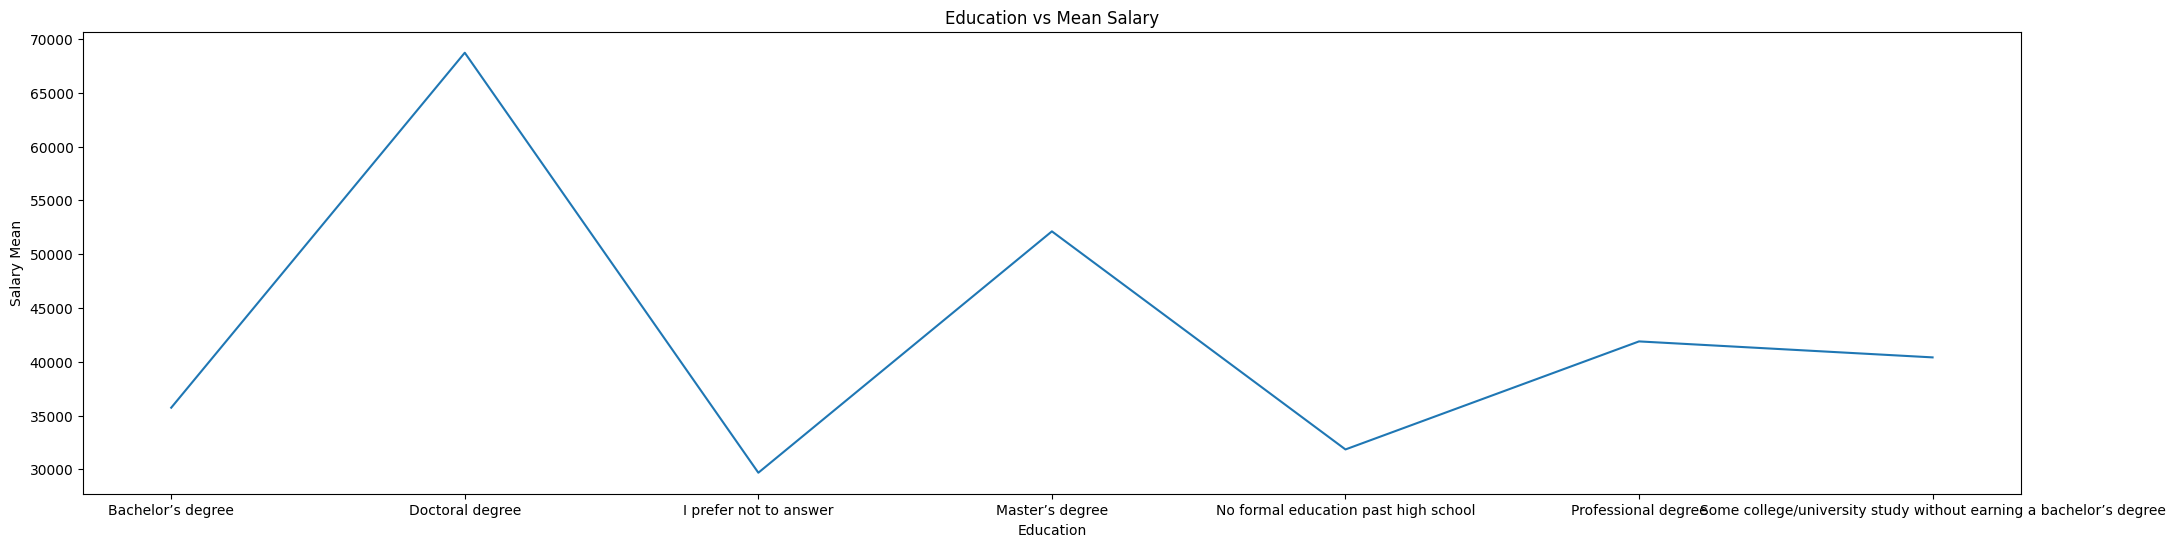

In [118]:
# Graphically shows salary mean between education levels
plt.plot(education_data.mean())
plt.title('Education vs Mean Salary')
plt.xlabel("Education")
plt.ylabel("Salary Mean")
plt.show()

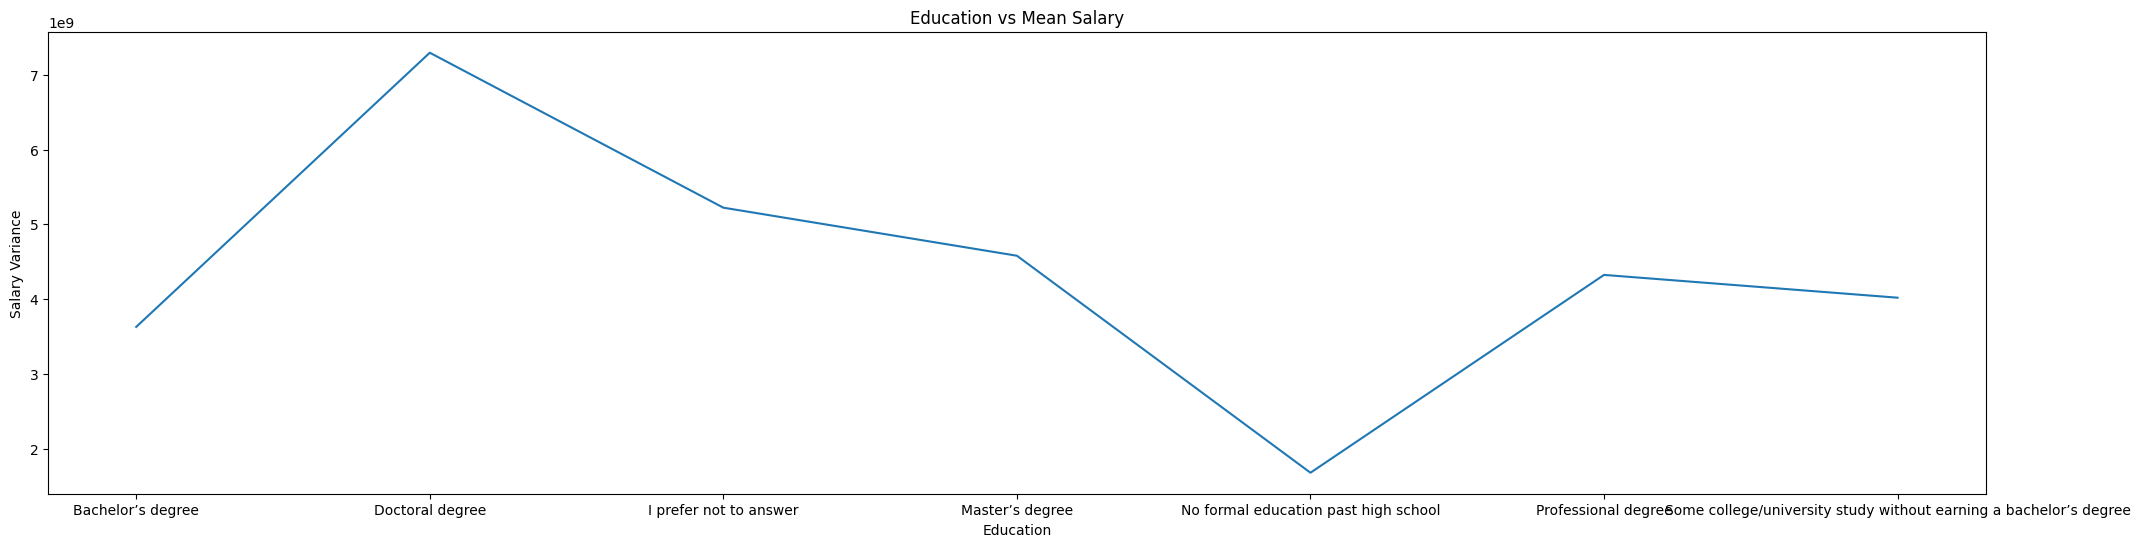

In [119]:
# Graphically shows salary variance between education levels
plt.plot(education_data.var())
plt.title('Education vs Mean Salary')
plt.xlabel("Education")
plt.ylabel("Salary Variance")
plt.show()

In [120]:
# Grouping be education level

bachelor_salary = adf[adf['Q4'] == 'Bachelor’s degree']['Q24']
doctoral_salary = adf[adf['Q4'] == 'Doctoral degree']['Q24']
master_salary = adf[adf['Q4'] == 'Master’s degree']['Q24']

In [121]:
# ANOVA testing - check if it's suitable to use by checking the distribution first
# Scipy.stats.shapiro( ) can test the null hypothesis that the data was drawn from a normal distribution. 
# It returns a tuple of test statistic and p-value. If p-value is less (<) than the alpha(0.05), we reject the null hypothesis, which means the data is not normally distributed.

shapiro_test1 = stats.shapiro(bachelor_salary)
print(shapiro_test1) #bachelor's data is not normal distributed"
shapiro_test2 = stats.shapiro(doctoral_salary)
print(shapiro_test2) #doctoral's data is not normal distributed"
shapiro_test3 = stats.shapiro(master_salary)
print(shapiro_test3) #master's data is not normal distributed"
# Since the dataset is not accorded to normal distribution, ANOVA test can not be conducted.

ShapiroResult(statistic=0.6054595112800598, pvalue=0.0)
ShapiroResult(statistic=0.7485721707344055, pvalue=2.802596928649634e-45)
ShapiroResult(statistic=0.7323898077011108, pvalue=0.0)


In [122]:
# Create empty list
bachelor = []
doctoral = []
master = []

# Bootstrapping the data for the data to converge to central limit theorem and fitting a normal distribution
# Procedure: Randomly select a sample, repeating that multiple times to calculate the mean, and then plotting the distribution of those means

for i in range(1000): # take 1000 sets of bootstrap samples 
  # number of datapoints averaged equals the original sample size
  bootstrap_bachelor_salary = bachelor_salary.sample(frac=1, replace=True) 
  bootstrap_doctoral_salary = doctoral_salary.sample(frac=1, replace=True) 
  bootstrap_master_salary = master_salary.sample(frac=1, replace=True)

  # calculate the mean for each set of bootstrap samples
  bootstrap_bachelor_salary_mean = bootstrap_bachelor_salary.mean()
  bootstrap_doctoral_salary_mean = bootstrap_doctoral_salary.mean()
  bootstrap_master_salary_mean = bootstrap_master_salary.mean()

  # append result of means into the list that just created
  bachelor.append(bootstrap_bachelor_salary_mean)
  doctoral.append(bootstrap_doctoral_salary_mean)
  master.append(bootstrap_master_salary_mean)

In [123]:
# Check if the data is normally distibuted after bootstrapping
# This provides us the test statistic and the p-value for null hypothesis
# Since P-values are larger than 5%, we cannot reject null hypothesis that the data is normally distributed

st.shapiro(bachelor),st.shapiro(doctoral),st.shapiro(master)

(ShapiroResult(statistic=0.9961269497871399, pvalue=0.013494138605892658),
 ShapiroResult(statistic=0.99875807762146, pvalue=0.7273945808410645),
 ShapiroResult(statistic=0.9981968402862549, pvalue=0.37505748867988586))

c:\Users\alex_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alex_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alex_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alex_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

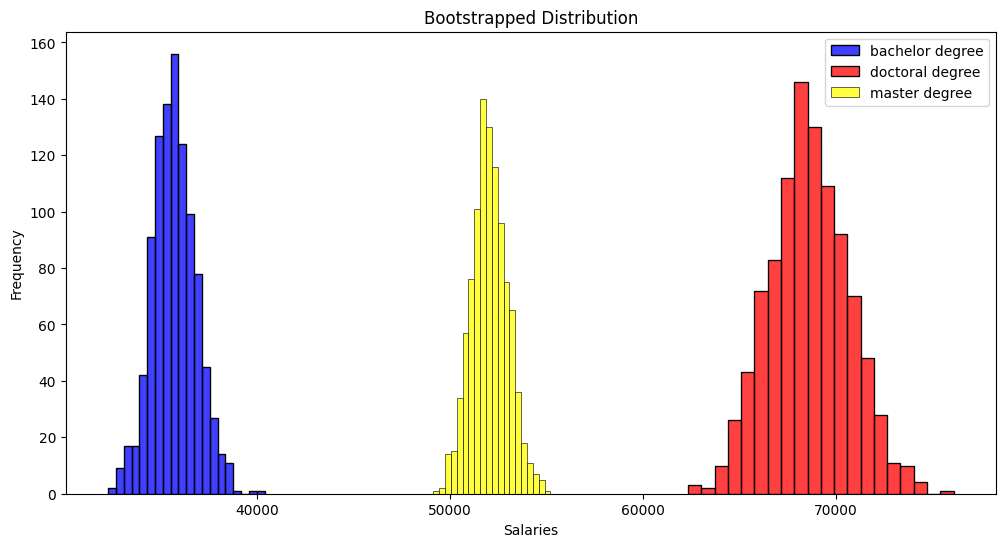

In [124]:
# Plot the distributions 
plt.figure(figsize=(12,6))
sns.histplot(bachelor, bins = 20, color = 'blue', label = 'bachelor degree')
sns.histplot(doctoral, bins = 20, color = 'red', label = 'doctoral degree')
sns.histplot(master, bins = 20, color = 'yellow', label = 'master degree')

plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.title("Bootstrapped Distribution")
plt.show()

In [125]:
# Perform 1-way ANOVA after bootstrapping
# Since p = 0 < 0.05, it is statistically significant, we reject the null hypothesis
# We can observe a clear relationship between education and salaries. Those who've completed a doctoral degree gets paid more, then masters, then bachelor's

tc, pc = stats.f_oneway(bachelor, doctoral, master)

print ("f-test: f = %g  p = %g" % (tc, pc))

f-test: f = 127014  p = 0


In [127]:
# Create a DataFrame with difference in means of salaries of doctoral, masters, and bachelors degrees
doctoral = pd.DataFrame(doctoral)
master = pd.DataFrame(master)
bachelor = pd.DataFrame(bachelor)

# Create pd series with the difference
# Difference between Doctoral and master
compare_education = pd.concat([doctoral.reset_index(drop=True),\
                     master.reset_index(drop=True)], axis=1)
# compare_education.set_axis(['doctoral', 'master'], axis=1, inplace=True)
compare_education.columns = ['doctoral', 'master']
compare_education['diff']=compare_education['doctoral']-compare_education['master']

# Difference between Doctoral and bachelor
compare_education1 = pd.concat([doctoral.reset_index(drop=True),\
                     bachelor.reset_index(drop=True)], axis=1)
# compare_education1.set_axis(['doctoral', 'bachelor'], axis=1, inplace=True)
compare_education1.columns = ['doctoral', 'bachelor']
compare_education1['diff']=compare_education1['doctoral']-compare_education1['bachelor']

# Difference between Master and bachelor
compare_education2 = pd.concat([master.reset_index(drop=True),\
                     bachelor.reset_index(drop=True)], axis=1)
# compare_education2.set_axis(['master', 'bachelor'], axis=1, inplace=True)
compare_education2.columns = ['master', 'bachelor']
compare_education2['diff']=compare_education2['master']-compare_education2['bachelor']

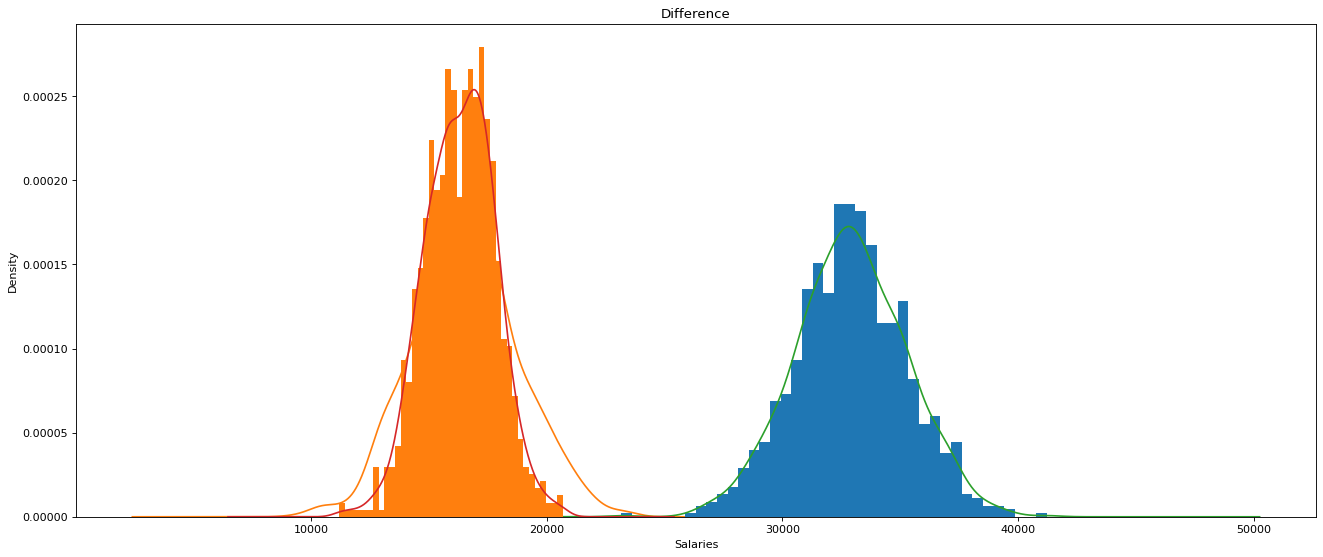

In [128]:
# Comparation of histogram in 'Salaries' and the histogram of difference
# Orange line is the difference in salary between doctoral and masters
# Green line is the difference in salary between doctoral and bachelor's
# Red line is the difference in salary between master and bachelor's

plt.figure(figsize=(20, 8), dpi=80)
compare_education['diff'].plot(kind='hist', rot=0, ax=axes[2], bins=40, title='Difference',density='True')
compare_education['diff'].plot.kde(zorder=0, color='C1') #Orange
compare_education1['diff'].plot(kind='hist', rot=0, bins=40, title='Difference',density='True')
compare_education1['diff'].plot.kde(zorder=1, color='C2') #Green
compare_education2['diff'].plot(kind='hist', rot=0, bins=40, title='Difference',density='True')
compare_education2['diff'].plot.kde(zorder=2, color='C3') #Red
plt.xlabel('Salaries')
fig.tight_layout()

**Summarize Findings:** After applying bootstrapping to the doctoral, master's, and bachelor's salaries, the mean salary data was normally distributed. This allowed us to perform a 1 way ANOVA test. Using the 1 way ANOVA test, we got a p value equal to 0, that shows the probability of the doctoral salary mean, the master's salary mean, and the bachelor's salary mean being equivalent. Thus, we can conclude there is a relationship between education level and salary. Those who obtained their doctoral degree are being paid higher compared to if they have received a master's or bachelor's degree. This is if we solely look at education and salaries, not accounting for country, job position, etc.